## Loan Prediction

## Table of Contents
1. Getting the system ready and loading the data
2. Understanding the data
3. Missing value and outlier treatment
4. splitting the data
5. Data preprocessing
6. Model Building
    i. SVM
    Model evaluation
    
7. Model Building
    ii. Logistic Regression
     Model evaluation

### 1. Getting the system ready and loading the data

Used libraries

1. Pandas
2. Num1py
3. Seaborn
4. Matplotlib
5. Sklearn

In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [259]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from pylab import rcParams
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [260]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv(r"C:\Users\CHINMAY\Documents\OneNote Notebooks\creditcard.csv\creditcard.csv")

### 2. Understanding the data


In [261]:
df.shape

(284807, 31)

In [263]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [264]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [265]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [266]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### visualizing the imbalanced distribution

Text(0, 0.5, 'Frequency')

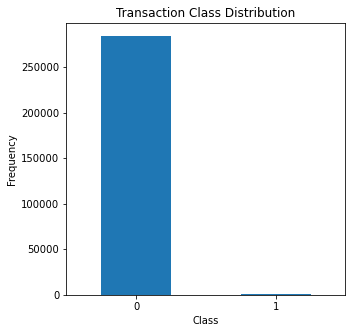

In [281]:
c_class = pd.value_counts(df['Class'], sort = True)

c_class.plot(kind = 'bar', rot=0, figsize=(5,5))

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")


<AxesSubplot:>

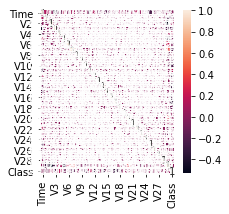

In [280]:
corr = df.corr()

sns.heatmap(corr, annot=True)

In [215]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [216]:
# statistical measures of the data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [217]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [218]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### 3. Missing value and outlier treatment


 since data is imbalanced, we can use undersampling to improve accuracy and model performance
we will make number of entries for noram transcation equal to that of fraud transaction
Number of Fraudulent Transactions --> 492

In [219]:
legit_sample = normal.sample(n=492)

In [220]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [221]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171411,120626.0,0.241990,0.895751,-1.941084,-1.098402,1.114913,-0.792642,1.142981,0.141678,-0.481316,...,0.348144,0.857653,-0.065869,0.205867,-0.048436,-0.528495,-0.111870,-0.071384,39.32,0
103035,68470.0,1.065299,-0.180928,1.261713,1.183333,-0.796125,0.580865,-0.786196,0.415438,0.731026,...,0.009300,0.197111,0.020122,0.009852,0.289232,-0.394624,0.080581,0.023373,9.99,0
236986,149048.0,-5.450769,2.399274,-4.401967,-0.679798,-2.287733,-1.145916,-1.519750,3.323114,-0.024218,...,-0.134060,-0.504067,0.147270,0.784868,0.533107,-0.119222,0.251005,-0.531049,40.00,0
20124,30798.0,1.133813,0.016537,1.014388,1.290535,-0.583292,0.173247,-0.446401,0.125708,0.686865,...,0.122719,0.665680,-0.114970,0.133767,0.600899,-0.188004,0.081156,0.027506,6.21,0
168666,119329.0,0.207983,0.121149,-1.266145,-0.328656,0.548162,-0.458634,1.655862,-0.679156,-2.424295,...,0.634518,1.730320,-0.247703,-0.855020,0.471929,0.751018,0.087073,0.151508,184.80,0


In [222]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

### 4. splitting the data


In [223]:
#Splitting* the data into Features & Targets

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [224]:
#spllitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### 5. Data preprocessing


In [241]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[ 1.38551822,  0.64224149, -0.09983031, ...,  0.41598513,
         0.4529261 , -0.21340692],
       [-0.40187804, -0.08418858, -0.4811606 , ...,  0.45341172,
        -0.33930053, -0.31374323],
       [ 1.11112915,  0.78706162, -0.54138731, ..., -0.08440012,
        -0.11329908, -0.34351052],
       ...,
       [-0.42501903,  0.09054303, -0.37390463, ...,  0.23945853,
         0.47400017,  1.39351367],
       [-0.66617036, -0.9353243 ,  0.17244945, ...,  1.11273888,
         0.76883359, -0.39868266],
       [ 1.46372099,  0.42306344, -0.36598743, ..., -0.12134917,
        -0.16350004, -0.30868425]])

### 6. Model Building
    i. SVM


In [242]:
from sklearn.svm import SVC

model = SVC()

In [243]:
# training the SVC with Training Data
model.fit(X_train, Y_train)

SVC()

####     Model evaluation using accuracy score and classification matrix

In [244]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [245]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5552731893265566


In [246]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [247]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.5685279187817259


In [254]:
#classification report

c_class = classification_report(X_test_prediction, Y_test, output_dict=True)

c_class1 = pd.DataFrame(c_class)
c_class1

,0,1,accuracy,macro avg,weighted avg
precision,0.949495,0.836735,0.893401,0.893115,0.899697
recall,0.854545,0.942529,0.893401,0.898537,0.893401
f1-score,0.899522,0.886486,0.893401,0.893004,0.893765
support,110.000000,87.000000,0.893401,197.000000,197.000000


### 7. Model Building
    ii. Logistic Regression

In [249]:
model = LogisticRegression()

# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

####  logistic regression model evaluation using accuracy score and classification matrix 

In [250]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [251]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.928843710292249


In [252]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [237]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8934010152284264


In [253]:
#classification report

c_class = classification_report(X_test_prediction, Y_test, output_dict=True)

c_class1 = pd.DataFrame(c_class)
c_class1

,0,1,accuracy,macro avg,weighted avg
precision,0.949495,0.836735,0.893401,0.893115,0.899697
recall,0.854545,0.942529,0.893401,0.898537,0.893401
f1-score,0.899522,0.886486,0.893401,0.893004,0.893765
support,110.000000,87.000000,0.893401,197.000000,197.000000


### confusion matrix and heatmap

In [239]:
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(X_test_prediction, Y_test)

<AxesSubplot:>

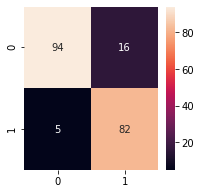

In [240]:
sns.heatmap(cf_metrix, annot=True)